# Predicting crop yield and productivity through machine learning algorithms
### <font color= green> **Mustafa Kamal Shahadat, Dr. Md. Khairul Alam, Arindom Biswas, Dr. Mohammad Mukhlesur Rahman**</font>

## Summary: 
Target variable: Yield/ha

Prediction model: Linear regression, SVR, ANN

Insights into the data: Missing data, outlier, correlation, feature selection

final function as follows: **$\frac{Yield}{Area}=f(water,\text{ uv}, \text{ fertilizer_usage},\text{ pesticides},\text{  region dummies excluding regions 0 & 3},\text{ categories dummies excluding d}, \text{pesticides^2})$.**

The coefficient of linear model indicates which features have the the most effect on the output. For instance pesticides squared has the strongest effect and region 2 (a dummy variable) intercept has the weakest effect.

This work is organized as follows: First, the data is read and explored. Then the data cleansing is performed. Then different methods of modeling is explored and compared. Finally, concluding remarks and future works are presented.

In [1]:
import os
os.getcwd()

'H:\\Training\\TMT_Bangladesh\\Phase II\\GDA&STML\\Group Project\\Review\\Machine-learning-approaches-for-crop-yield-prediction-master'

In [2]:
os.chdir(r'H:\Training\TMT_Bangladesh\Phase II\GDA&STML\Group Project\G-5_Data')

In [3]:
os.getcwd()

'H:\\Training\\TMT_Bangladesh\\Phase II\\GDA&STML\\Group Project\\G-5_Data'

## Reading and exploring the data
At the beginning of the code, first all of the required packages are imported. Then the csv file is read in and explored.
### Importing packages 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.svm import SVR
from sklearn.feature_selection import RFECV

### Reading the data

In [4]:
df = pd.read_csv("G_5_data.csv")
display(df.head())
df.shape

,Year,District,crop,Production,Area_ha,Yield_t/ha,TP,RPI,SPI,DTR,Prod_category
0,1995-96,Bagerhat,aman,207455,110150,1.88,1.72,9.72,-0.11,5.88,H
1,1996-97,Bagerhat,aman,203787,110300,1.85,1.73,6.53,0.29,6.15,H
2,1997-98,Bagerhat,aman,198191,112890,1.76,1.75,0.20,0.32,5.80,L
3,1998-99,Bagerhat,aman,180681,103958,1.74,1.77,-1.79,0.90,5.40,M
4,1999-00,Bagerhat,aman,210729,107723,1.96,1.79,9.44,-0.47,6.08,H


(264, 11)

In [5]:
df_Year = df['Year'].str.split("-", expand=True)

display(df_Year.head(5))

,0,1
0,1995,96
1,1996,97
2,1997,98
3,1998,99
4,1999,00


In [6]:
df = pd.concat([df, df_Year], axis=1)

display(df.head(5))

,Year,District,crop,Production,Area_ha,Yield_t/ha,TP,RPI,SPI,DTR,Prod_category,0,1
0,1995-96,Bagerhat,aman,207455,110150,1.88,1.72,9.72,-0.11,5.88,H,1995,96
1,1996-97,Bagerhat,aman,203787,110300,1.85,1.73,6.53,0.29,6.15,H,1996,97
2,1997-98,Bagerhat,aman,198191,112890,1.76,1.75,0.20,0.32,5.80,L,1997,98
3,1998-99,Bagerhat,aman,180681,103958,1.74,1.77,-1.79,0.90,5.40,M,1998,99
4,1999-00,Bagerhat,aman,210729,107723,1.96,1.79,9.44,-0.47,6.08,H,1999,00


In [7]:
# Dropping Year column
df.drop('Year', axis=1, inplace=True)
display(df.head(5))

,District,crop,Production,Area_ha,Yield_t/ha,TP,RPI,SPI,DTR,Prod_category,0,1
0,Bagerhat,aman,207455,110150,1.88,1.72,9.72,-0.11,5.88,H,1995,96
1,Bagerhat,aman,203787,110300,1.85,1.73,6.53,0.29,6.15,H,1996,97
2,Bagerhat,aman,198191,112890,1.76,1.75,0.20,0.32,5.80,L,1997,98
3,Bagerhat,aman,180681,103958,1.74,1.77,-1.79,0.90,5.40,M,1998,99
4,Bagerhat,aman,210729,107723,1.96,1.79,9.44,-0.47,6.08,H,1999,00


In [8]:
df = df.rename(columns={0: 'year',
                        1: 'year_2'})

display(df.head())

,District,crop,Production,Area_ha,Yield_t/ha,TP,RPI,SPI,DTR,Prod_category,year,year_2
0,Bagerhat,aman,207455,110150,1.88,1.72,9.72,-0.11,5.88,H,1995,96
1,Bagerhat,aman,203787,110300,1.85,1.73,6.53,0.29,6.15,H,1996,97
2,Bagerhat,aman,198191,112890,1.76,1.75,0.20,0.32,5.80,L,1997,98
3,Bagerhat,aman,180681,103958,1.74,1.77,-1.79,0.90,5.40,M,1998,99
4,Bagerhat,aman,210729,107723,1.96,1.79,9.44,-0.47,6.08,H,1999,00


In [9]:
# Dropping year_2 column
df.drop('year_2', axis=1, inplace=True)
display(df.head(5))

,District,crop,Production,Area_ha,Yield_t/ha,TP,RPI,SPI,DTR,Prod_category,year
0,Bagerhat,aman,207455,110150,1.88,1.72,9.72,-0.11,5.88,H,1995
1,Bagerhat,aman,203787,110300,1.85,1.73,6.53,0.29,6.15,H,1996
2,Bagerhat,aman,198191,112890,1.76,1.75,0.20,0.32,5.80,L,1997
3,Bagerhat,aman,180681,103958,1.74,1.77,-1.79,0.90,5.40,M,1998
4,Bagerhat,aman,210729,107723,1.96,1.79,9.44,-0.47,6.08,H,1999


In [10]:
print(df.columns)

Index(['District', 'crop', 'Production', 'Area_ha', 'Yield_t/ha', 'TP', 'RPI',
       'SPI', 'DTR', 'Prod_category', 'year'],
      dtype='object')


In [11]:
new_col_sequence = ['year','District', 'crop', 'Production', 'Area_ha', 'Yield_t/ha', 'TP', 'RPI','SPI', 'DTR', 'Prod_category']

In [12]:
df = df[new_col_sequence]

display(df.head(5))

,year,District,crop,Production,Area_ha,Yield_t/ha,TP,RPI,SPI,DTR,Prod_category
0,1995,Bagerhat,aman,207455,110150,1.88,1.72,9.72,-0.11,5.88,H
1,1996,Bagerhat,aman,203787,110300,1.85,1.73,6.53,0.29,6.15,H
2,1997,Bagerhat,aman,198191,112890,1.76,1.75,0.20,0.32,5.80,L
3,1998,Bagerhat,aman,180681,103958,1.74,1.77,-1.79,0.90,5.40,M
4,1999,Bagerhat,aman,210729,107723,1.96,1.79,9.44,-0.47,6.08,H


In [13]:
df['year'] = df['year'].astype('int') 
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           264 non-null    int32  
 1   District       264 non-null    object 
 2   crop           264 non-null    object 
 3   Production     264 non-null    int64  
 4   Area_ha        264 non-null    int64  
 5   Yield_t/ha     264 non-null    float64
 6   TP             264 non-null    float64
 7   RPI            264 non-null    float64
 8   SPI            262 non-null    float64
 9   DTR            255 non-null    float64
 10  Prod_category  264 non-null    object 
dtypes: float64(5), int32(1), int64(2), object(3)
memory usage: 21.8+ KB
None


In [14]:
df.isnull().sum()

year             0
District         0
crop             0
Production       0
Area_ha          0
Yield_t/ha       0
TP               0
RPI              0
SPI              2
DTR              9
Prod_category    0
dtype: int64

In [15]:
# def time_series_plot(data, title):    
#     plt.plot(data.year, data.SPI.values, label='SPI', marker='o')
#     plt.plot(data.year, data.DTR.values, label='DRT', marker='o')

#     plt.xticks(rotation=90)
#     plt.ylabel("value")
#     plt.legend()
#     plt.title(title)

In [16]:
replace_by_mean = df['SPI'].fillna(df['SPI'].mean(), inplace = True)
replace_by_mean2 = df['DTR'].fillna(df['DTR'].mean(), inplace = True)
print(df.isnull().sum())

year             0
District         0
crop             0
Production       0
Area_ha          0
Yield_t/ha       0
TP               0
RPI              0
SPI              0
DTR              0
Prod_category    0
dtype: int64


In [17]:
# df['SPI'].fillna(df['SPI'].median(), inplace = True)
# df['DTR'].fillna(df['DTR'].median(), inplace = True)
# print(df.isnull().sum())

In [18]:
# df['SPI'].fillna(df['SPI'].interpolate(), inplace = True)
# df['DTR'].fillna(df['DTR'].interpolate(), inplace = True)
# print(df.isnull().sum())

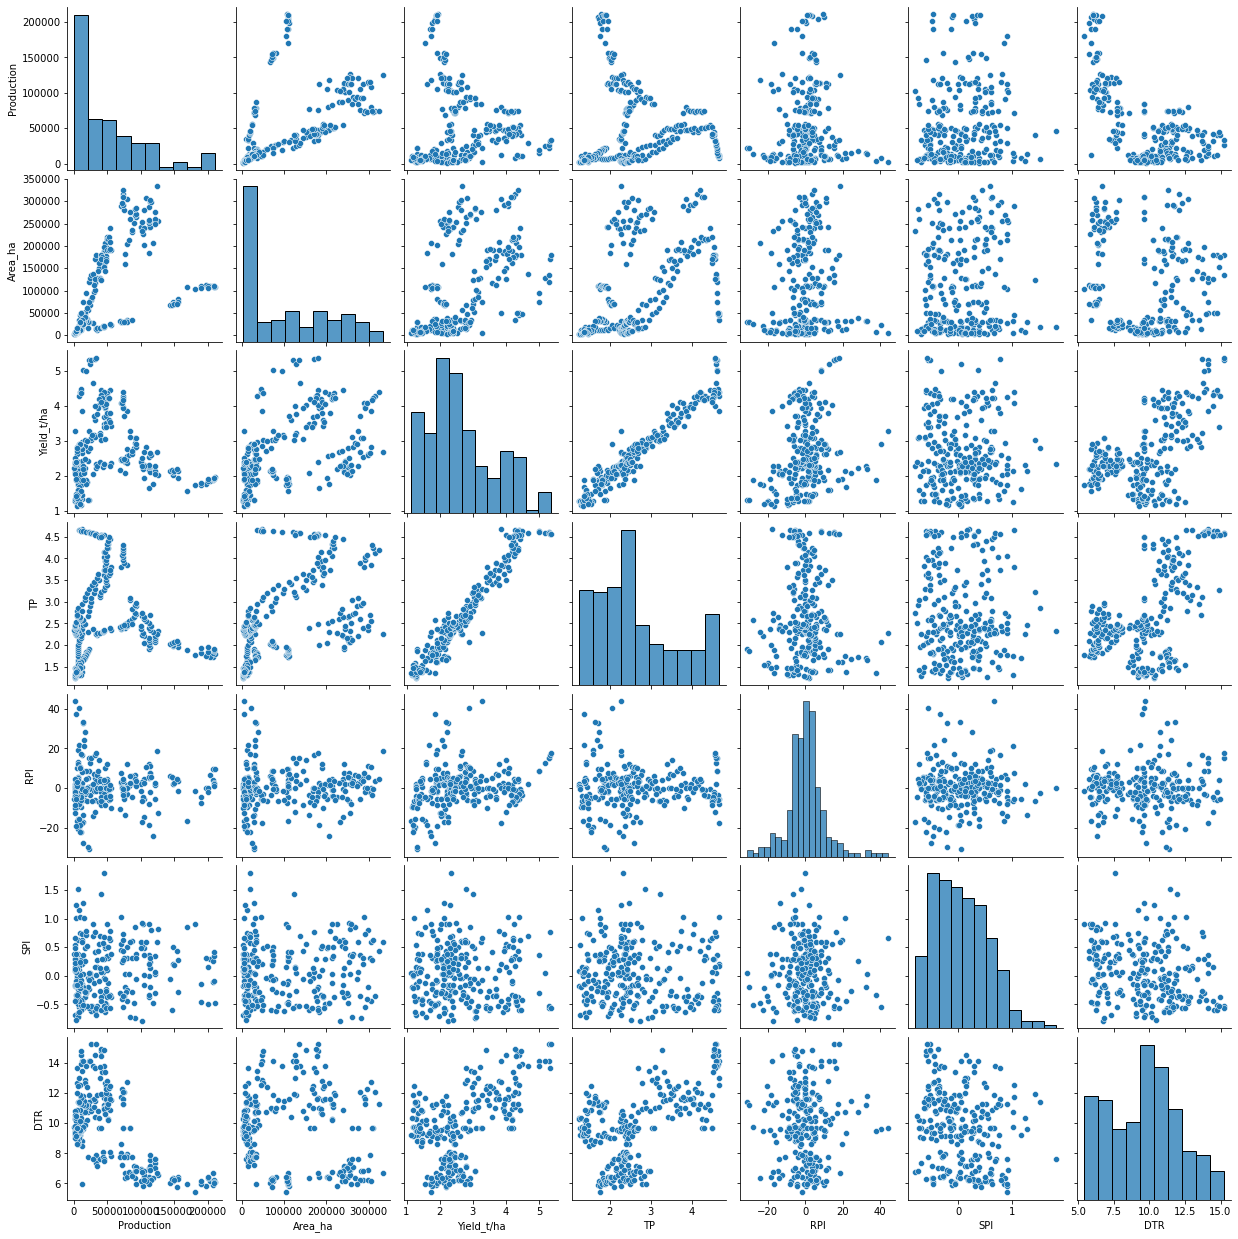

In [19]:
sns.pairplot(df,vars=['Production', 'Area_ha', 'Yield_t/ha', 'TP', 'RPI','SPI', 'DTR'])
plt.show()

<AxesSubplot:>

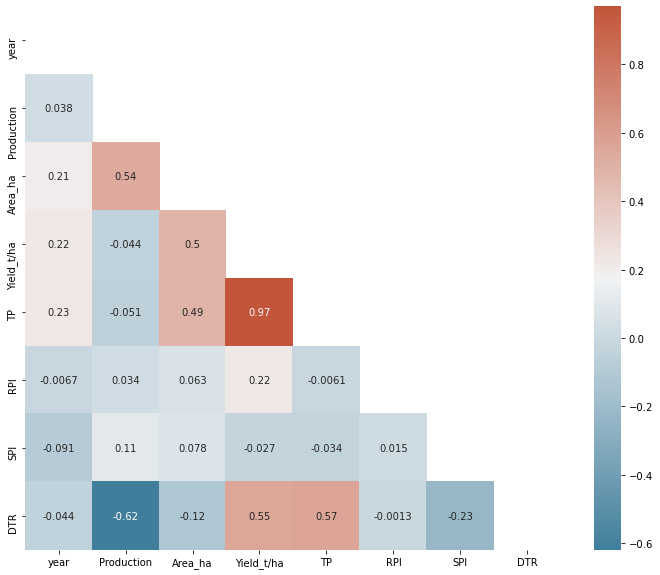

In [20]:
# Correlation between different variables
corr = df.corr()
# Set up the matplotlib plot configuration
f, ax = plt.subplots(figsize=(12, 10))
# Generate a mask for upper traingle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Configure a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

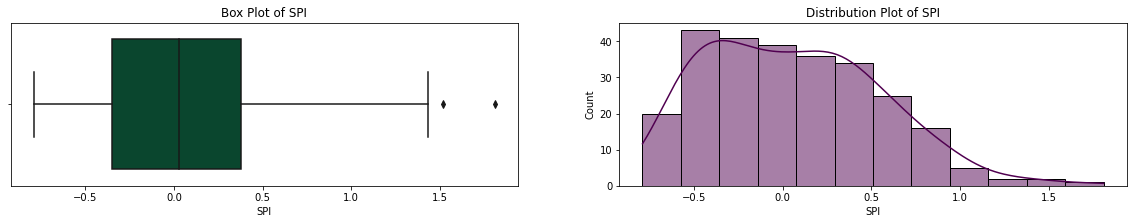

In [21]:
plt.figure(figsize=(20,3))

plt.subplot(1,2,1)
sns.boxplot(x=df['SPI'],color='#005030')
plt.title(f'Box Plot of SPI')

plt.subplot(1,2,2)
sns.histplot(x=df['SPI'], color='#500050', kde=True)
plt.title(f'Distribution Plot of SPI')
plt.show()

In [22]:
df.shape

(264, 11)

#### Checking multicolinearity

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
  
# the independent variables set
var = df[['Production', 'Area_ha', 'Yield_t/ha', 'TP', 'RPI','SPI', 'DTR']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = var.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(var.values, i)
                          for i in range(len(var.columns))]
  
print(vif_data)

      feature          VIF
0  Production     2.551935
1     Area_ha     5.031544
2  Yield_t/ha  1025.696545
3          TP  1013.357196
4         RPI     7.662586
5         SPI     1.039214
6         DTR    15.837397


In [24]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

df['Prod_category'] = LE.fit_transform(df['Prod_category'])
display(df.sample(10))

,year,District,crop,Production,Area_ha,Yield_t/ha,TP,RPI,SPI,DTR,Prod_category
74,2003,Khulna,aman,102877,237296,2.31,2.24,3.02,0.53,6.15,2
138,2001,Narail,aman,43218,18785,2.30,2.31,-0.22,0.06,8.08,2
45,1996,Bagerhat,aus,9887,13217,1.34,1.44,-7.48,0.75,9.20,2
229,2004,Satkhira,boro,53225,191610,3.60,3.62,-0.49,-0.35,12.35,2
76,2005,Khulna,aman,126290,255635,2.02,2.32,-12.68,0.82,6.53,0
5,2000,Bagerhat,aman,190318,110473,1.72,1.81,-4.57,-0.46,5.93,2
47,1998,Bagerhat,aus,6442,9460,1.47,1.55,-5.13,-0.41,8.88,1
213,2010,Satkhira,aman,12265,33970,2.77,2.79,-0.71,0.63,5.93,1
70,1999,Khulna,aman,113820,254206,2.23,2.08,7.36,0.24,7.53,0
146,2009,Narail,aman,54902,24179,2.27,2.40,-5.47,-0.34,8.10,2


In [31]:
pd.get_dummies(df, drop_first=True)

,year,Production,Area_ha,TP,RPI,SPI,DTR,Prod_category,District_Bagerhat,District_Khulna,District_Narail,District_Satkhira,crop_aman,crop_aus,crop_boro,Yield_t/ha)
0,1995,207455,110150,1.72,9.72,-0.11,5.880000,0,1,0,0,0,1,0,0,1.88
1,1996,203787,110300,1.73,6.53,0.29,6.150000,0,1,0,0,0,1,0,0,1.85
2,1997,198191,112890,1.75,0.20,0.32,5.800000,1,1,0,0,0,1,0,0,1.76
3,1998,180681,103958,1.77,-1.79,0.90,5.400000,2,1,0,0,0,1,0,0,1.74
4,1999,210729,107723,1.79,9.44,-0.47,6.080000,0,1,0,0,0,1,0,0,1.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,2012,9440,27102,2.60,10.30,0.24,9.480000,0,0,0,0,1,0,1,0,2.87
260,2013,10280,29810,2.62,10.49,-0.17,10.130000,0,0,0,0,1,0,1,0,2.90
261,2014,10170,29574,2.65,9.90,-0.13,9.550000,0,0,0,0,1,0,1,0,2.91
262,2015,5904,15934,2.67,1.17,-0.34,9.665176,0,0,0,0,1,0,1,0,2.70


In [35]:
display(df.columns)

Index(['year', 'Production', 'Area_ha', 'TP', 'RPI', 'SPI', 'DTR',
       'Prod_category', 'District_Bagerhat', 'District_Khulna',
       'District_Narail', 'District_Satkhira', 'crop_aman', 'crop_aus',
       'crop_boro', 'Yield_t/ha)'],
      dtype='object')

In [38]:
#all parameters
x = df.drop("Production",axis=1)
y = df[["Production"]]
cols = ['year', 'Area_ha', 'TP', 'RPI', 'SPI', 'DTR',
       'Prod_category', 'District_Bagerhat', 'District_Khulna',
       'District_Narail', 'District_Satkhira', 'crop_aman', 'crop_aus',
       'crop_boro', 'Yield_t/ha)']
#selected parameters
x1 = df.drop(cols,axis=1)

from sklearn.preprocessing import StandardScaler
std = StandardScaler()
x = std.fit_transform(x)
y = std.fit_transform(y)
x1 = std.fit_transform(x1)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.02, random_state=71)
x1_train, x1_test, y_train, y_test = train_test_split(x1, y, test_size=0.02, random_state=71)

# RANDOM FOREST

In [39]:
#Using all parameters
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train,y_train)
pred_all = model.predict(x_test)
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score, recall_score, precision_score
 
print("R2score:", r2_score(y_test,pred_all))
print('RMSE:', np.sqrt(mean_squared_error(y_test, pred_all)))
print('MAE:', mean_absolute_error(y_test, pred_all))

<ipython-input-39-d86d39f36712>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train,y_train)


R2score: -0.6327732232870211
RMSE: 0.26955138521594907
MAE: 0.12857719492436973


In [40]:
#using selected parameters
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x1_train,y_train)
pred_selected = model.predict(x1_test)
from sklearn.metrics import r2_score
r = r2_score(y_test,pred_selected)
print("R2score: ",r)
print('RMSE:',np.sqrt(mean_squared_error(y_test, pred_selected)))
print('MAE:',mean_absolute_error(y_test, pred_selected))

R2score:  0.9997697977751737
RMSE: 0.0032006146703201705
MAE: 0.002158702869656609


<ipython-input-40-caeda6bf587a>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x1_train,y_train)


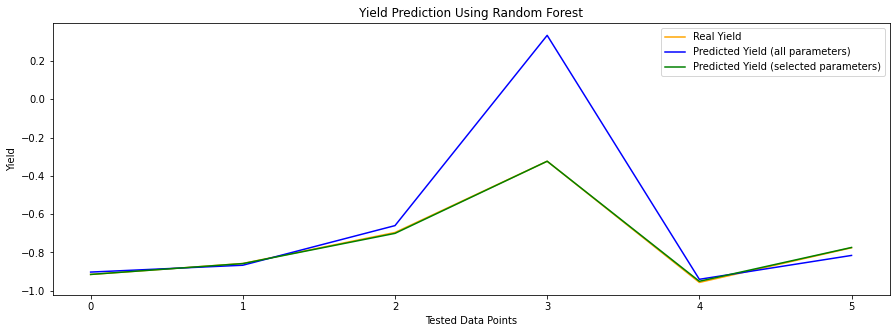

In [41]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15,5))
plt.plot(y_test, color='orange',label='Real Yield')
plt.plot(pred_all, color='blue',label='Predicted Yield (all parameters)')
plt.plot(pred_selected, color='green',label='Predicted Yield (selected parameters)')
plt.title('Yield Prediction Using Random Forest')
plt.xlabel("Tested Data Points")
plt.ylabel('Yield')
plt.legend()
plt.show()

# SUPPORT VECTOR MACHINE

In [42]:
#using all parameters
from sklearn.svm import SVR
from sklearn import metrics
svr=SVR() #Default hyperparameters
svr.fit(x_train,y_train)
pred_all=svr.predict(x_test)
#print('r2 Score:')
print('R2 score:',r2_score(y_test, pred_all))
print('RMSE:',np.sqrt(mean_squared_error(y_test, pred_all)))
print('MAE:',mean_absolute_error(y_test, pred_all))

R2 score: 0.27030788682010265
RMSE: 0.18019737465984206
MAE: 0.14293166216453154


C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [43]:
#using selected parameters
from sklearn.svm import SVR
from sklearn import metrics
svr=SVR() #Default hyperparameters
svr.fit(x1_train,y_train)
pred_sel = svr.predict(x1_test)
#print('r2 Score:')
print('R2 score:',r2_score(y_test,pred_sel))
print('RMSE:',np.sqrt(mean_squared_error(y_test, pred_sel)))
print('MAE:',mean_absolute_error(y_test, pred_sel))

R2 score: 0.8991196590018607
RMSE: 0.06700109555147553
MAE: 0.060031084414814896


C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


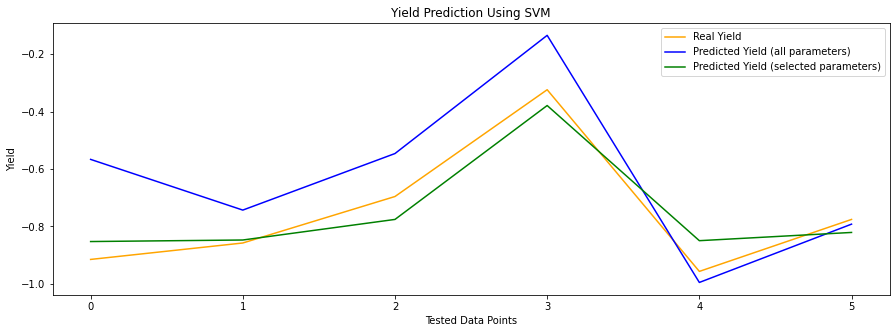

In [44]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15,5))
plt.plot(y_test, color='orange',label='Real Yield')
plt.plot(pred_all, color='blue',label='Predicted Yield (all parameters)')
plt.plot(pred_sel, color='green',label='Predicted Yield (selected parameters)')
plt.title('Yield Prediction Using SVM')
plt.xlabel("Tested Data Points")
plt.ylabel('Yield')
plt.legend()
plt.show()

# LASSO REGRESSION

In [45]:
#using all parameters
from sklearn.linear_model import Lasso

model_lasso = Lasso(alpha=0.01)
model_lasso.fit(x_train, y_train) 
pred_all= model_lasso.predict(x_test)

print('R2 score:',r2_score(y_test, pred_all))
print('RMSE:',np.sqrt(mean_squared_error(y_test,pred_all))) 
print('MAE:',mean_absolute_error(y_test, pred_all))

R2 score: -1.6451356454498498
RMSE: 0.3430856924502009
MAE: 0.23243068554442534


In [46]:
#using selected parameters
from sklearn.linear_model import Lasso

model_lasso = Lasso(alpha=0.01)
model_lasso.fit(x1_train, y_train) 
pred_sel= model_lasso.predict(x1_test)

print('R2 score:',r2_score(y_test, pred_sel))
print('RMSE:',np.sqrt(mean_squared_error(y_test,pred_sel))) 
print('MAE:',mean_absolute_error(y_test, pred_sel))

R2 score: 0.9985856179287531
RMSE: 0.007933448457100398
MAE: 0.007652834544660221


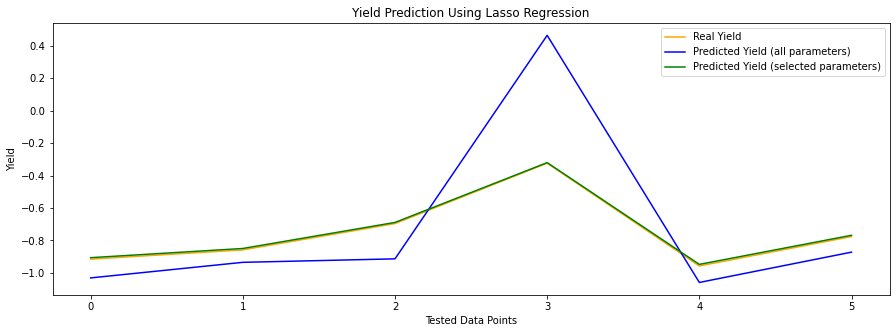

In [47]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15,5))
plt.plot(y_test, color='orange',label='Real Yield')
plt.plot(pred_all, color='blue',label='Predicted Yield (all parameters)')
plt.plot(pred_sel, color='green',label='Predicted Yield (selected parameters)')
plt.title('Yield Prediction Using Lasso Regression')
plt.xlabel("Tested Data Points")
plt.ylabel('Yield')
plt.legend()
plt.show()